In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    qwery_visitors = """
    SELECT DATE(datetime) as date, COUNT(*) AS visit_count
    FROM pageviews
    WHERE uid LIKE 'user_%'
    GROUP BY date
    """

    df_visitors = pd.read_sql(qwery_visitors, connection)
except FileNotFoundError as e:
    print("File not found")
    raise e

print(df_visitors)

          date  visit_count
0   2020-04-17            1
1   2020-04-18           23
2   2020-04-19           15
3   2020-04-21            3
4   2020-04-22            1
5   2020-04-23            5
6   2020-04-25            1
7   2020-04-26            8
8   2020-04-28            2
9   2020-04-29            4
10  2020-04-30            9
11  2020-05-01            3
12  2020-05-02            6
13  2020-05-03           19
14  2020-05-04            1
15  2020-05-05            1
16  2020-05-06            3
17  2020-05-07            2
18  2020-05-08           48
19  2020-05-09           19
20  2020-05-10          110
21  2020-05-11          200
22  2020-05-12           85
23  2020-05-13          102
24  2020-05-14          187
25  2020-05-15           29
26  2020-05-16            4
27  2020-05-17            9
28  2020-05-18           51
29  2020-05-19           11
30  2020-05-20           12
31  2020-05-21           11
32  2020-05-22            2


In [3]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    qwery_commits = """
    SELECT DATE(timestamp) as date, COUNT(*) AS comment_count
    FROM checker
    WHERE uid LIKE 'user_%'
    GROUP BY date
    """

    df_comments = pd.read_sql(qwery_commits, connection)
except FileNotFoundError as e:
    print("File not found")
    raise e

print(df_comments)


          date  comment_count
0   2020-04-17             23
1   2020-04-18             69
2   2020-04-19             33
3   2020-04-20             25
4   2020-04-21             25
5   2020-04-22             28
6   2020-04-23             43
7   2020-04-24             16
8   2020-04-25            104
9   2020-04-26            261
10  2020-04-27              6
11  2020-04-28              5
12  2020-04-29             17
13  2020-04-30             53
14  2020-05-01             60
15  2020-05-02            242
16  2020-05-03            180
17  2020-05-04             37
18  2020-05-05            139
19  2020-05-06              2
20  2020-05-07             52
21  2020-05-08             87
22  2020-05-09             86
23  2020-05-10            143
24  2020-05-11            186
25  2020-05-12            323
26  2020-05-13            211
27  2020-05-14            575
28  2020-05-15             10
29  2020-05-16              4
30  2020-05-17             48
31  2020-05-18              3
32  2020-0

In [4]:
# Создаем общий фрейм из двух полученных
df_combined = pd.merge(df_visitors, df_comments, on='date', how='inner')

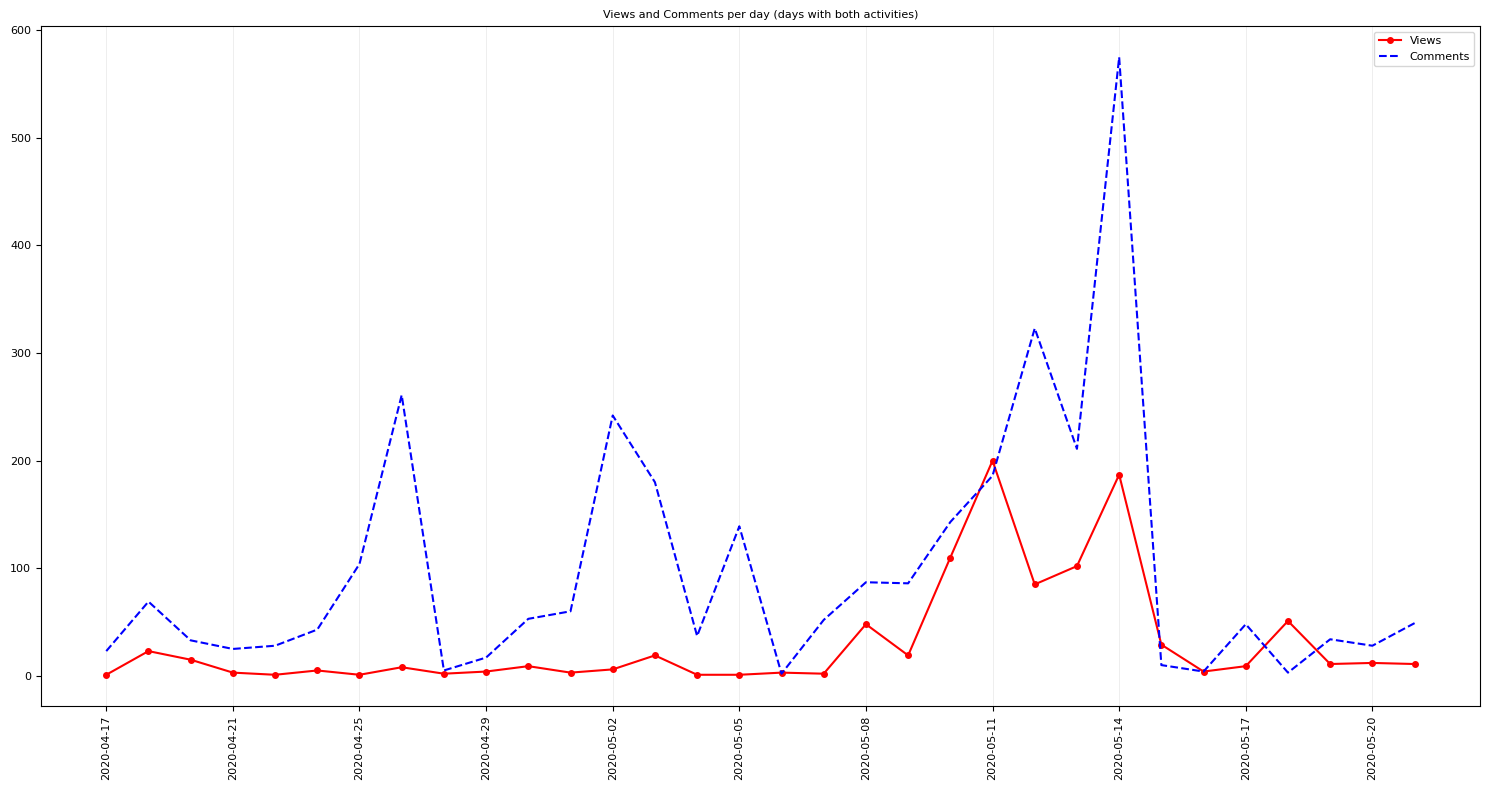

In [5]:
# Создаем график с одной осью Y
fig, ax = plt.subplots(figsize=(15, 8))

# Первый график (views) - с точками
ax.plot(df_combined['date'], df_combined['visit_count'],
        color='red', marker='o', markersize=4, label='Views')

# Второй график (comments) - с пунктирной линией
ax.plot(df_combined['date'], df_combined['comment_count'],
        color='blue', linestyle='--', label='Comments')

# Настройка оси Y
ax.tick_params(axis='y', labelsize=8)

#Настройка оси X - настраиваемые параметры
every_nth = 3        # Каждую 4-ую дату
start_index = 0      # Начинаем со второго значения

# Создаем список индексов для тиков
tick_positions = list(range(start_index, len(df_combined), every_nth))

# Устанавливаем тики
ax.set_xticks(tick_positions)
ax.set_xticklabels([df_combined['date'].iloc[i] for i in tick_positions])
ax.tick_params(axis='x', rotation=90, labelsize=8)

# Добавляем сетку
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, axis='x')

# Общий заголовок
plt.title('Views and Comments per day (days with both activities)', fontsize=8)

# Легенда
ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


In [6]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    qwery_visitors = """
    SELECT DATE(datetime) as date, COUNT(*)
    FROM pageviews
    WHERE uid LIKE 'user_%'
    GROUP BY date
    HAVING COUNT(*) > 150
    """

    df_visitors = pd.read_sql(qwery_visitors, connection)
    df_visitors['date'] = pd.to_datetime(df_visitors['date'])
    print(len(df_visitors))
except FileNotFoundError as e:
    print("File not found")
    raise e

2


In [7]:
connection.close()

**Вопрос** Сколько раз количество просмотров превышало 150?<br>
**Ответ**: 2